<a href="https://colab.research.google.com/github/hermescosta/Hermes-2025-/blob/main/An%C3%A1lise_de_portf%C3%B3lio_RBras_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudo teve início no meu primeiro ano da graduação em Bacharelado em Estatística, com o objetivo de aplicar técnicas estatísticas descritivas em um contexto prático e acessível. A análise foi conduzida com foco na visualização e interpretação de dados de um portfólio de ações, permitindo uma compreensão mais intuitiva dos padrões de comportamento dos ativos. O trabalho foi apresentado na RBras 2023, realizada na cidade de Londrina, destacando-se pela abordagem visual e pela capacidade de extrair insights relevantes mesmo com ferramentas estatísticas iniciais.

# **Análise de Portfólio**

# Introdução

No campo da avaliação de investimentos, a compreensão do nível de risco associado a um ativo desempenha um papel fundamental. O risco é um fator crucial na determinação da taxa de desconto utilizada para trazer os fluxos de caixa futuros a valor presente. A taxa de desconto, por sua vez, reflete o risco ao qual o capital investido está exposto em uma empresa, afetando diretamente a avaliação de projetos e a tomada de decisão dos investidores.

No contexto dos investimentos, o risco está intimamente relacionado à probabilidade real de obter um retorno inferior ao esperado. Os investidores, conscientes desse risco, exigem uma taxa de retorno maior para compensar a incerteza e o potencial de perdas. Essa relação positiva entre risco e retorno esperado implica que projetos com maior volatilidade esperada exigiriam um prêmio de risco maior para atrair investidores.


# Objetivo

 Calcular estatísticas descritivas, como volatilidade, matriz de correlação, índice de Sharp e VaR, a fim de ajudar os investidores a compreender os riscos e retornos envolvidos na seleção de uma carteira de investimentos e, assim, minimizar perdas.

 Inicialmente importamos as bilbiotecas necessarias:



*   YFinance: permite acessar dados financeiros do Yahoo Finance diretamente no Python.
*   NumPy: biblioteca para computação numérica.
*   Matplotlib: para visualização gráfica dos dados, permitindo criar gráficos de linha, barras, histogramas...
*   Pandas: manipulação e análise dos dados.
*   Seaborn: biblioteca baseada no Matplotlib que facilita a criação de gráficos estatísticos bonitos e informativos com menos código e integração direta com Pandas.








In [32]:
# importar as bibliotecas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Obtenção dos Dados

O portfólio analisado é composto pelos seguintes ativos da bolsa de valores brasileira: PETR4.SA, VALE3.SA, ITUB4.SA, BBDC4.SA e BBAS3.SA. Para cada um desses ativos, foram coletados os preços históricos de fechamento diário no período de 1º de janeiro de 2022 a 31 de dezembro de 2022. A coleta foi realizada utilizando a biblioteca yfinance, que permite acesso automatizado e direto à base de dados do Yahoo Finance, facilitando o processo de extração e manipulação das séries temporais financeiras.

Definimos abaixo o período de análise, que compreende do início ao fim do ano de 2022.
Essas datas serão utilizadas para filtrar os dados históricos de cada ativo.

In [16]:
# período de tempo
data_inicio = '2022-01-01'
data_fim = '2022-12-31'


Selecionamos os ativos que compõem o portfólio a ser analisado.
 Cada código representa uma ação negociada na B3.

In [17]:
# ações do portfólio
acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA']


Utilizamos a função "download" da biblioteca yfinance para obter dados historicos, dos preços de fechamento das ações.

In [18]:
# dados históricos
dados = yf.download(acoes, start=data_inicio, end=data_fim)


/tmp/ipython-input-1658336929.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(acoes, start=data_inicio, end=data_fim)
[*********************100%***********************]  5 of 5 completed


In [19]:
dados.shape


(250, 25)

In [20]:
dados.head()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-01-03  11.296652  13.909068  15.762444  10.843155  57.766415  11.665106   
2022-01-04  11.308411  14.000261  16.209454  10.884154  57.085075  11.426002   
2022-01-05  11.120267  13.901273  15.901683  10.462955  57.625706  11.359370   
2022-01-06  11.210419  14.099258  16.224108  10.455499  58.788441  11.312332   
2022-01-07  11.222178  14.304309  16.583183  10.503956  62.209984  11.296653   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-01-03  14.071541  15.982283  10.891611  59.225388  ...  11.418163   
2022-01-04  14.085111  16.253421  10.958703  58.558858  ...  11.414243   
2022-01-05  14.085115  16.282738  10.910249  58.270026  ...  11.296654   
2022-01-06  14.134614  16.297388  10.679146  59.506819  ...  11.139863   
2022-01-07  14.304309  16.597838  10.544958  62.209984  ...  11.214339   

Price                                                     Volume             \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA   BBDC4.SA   
Date                                                                          
2022-01-03  13.711276  15.513294  10.638145  58.507010  32338600   35620970   
2022-01-04  13.915411  15.843055  10.869244  58.144127  23429600  110060060   
2022-01-05  13.964910  16.187474  10.880429  57.299848  26325600   45808070   
2022-01-06  13.851779  15.857711  10.544958  58.240402  20271000   36651120   
2022-01-07  14.120466  16.187473  10.477864  59.543843  16377400   84778540   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-01-03  36138190  52704700  18557200  
2022-01-04  48343460  51739200  18178700  
2022-01-05  34807190  78459800  22039000  
2022-01-06  39441490  61163100  22044100  
2022-01-07  47174930  47507600  35213100  

[5 rows x 25 columns]

In [21]:
dados.tail()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-12-23  15.146654  12.029310  19.192970  14.997812  70.064392  15.301212   
2022-12-26  15.125191  11.743274  18.811998  14.890344  70.705620  15.271162   
2022-12-27  14.622875  11.687657  18.705326  14.991842  72.393929  15.219639   
2022-12-28  14.884766  12.045198  19.086294  14.806756  72.231583  14.940579   
2022-12-29  14.910527  12.037255  19.048203  14.627642  72.142288  15.043619   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-12-23  12.140545  19.436787  15.057516  70.226726  ...  14.824659   
2022-12-26  12.021362  19.185344  15.105280  71.054643  ...  15.271162   
2022-12-27  11.902182  18.842474  15.111251  72.767302  ...  15.219639   
2022-12-28  12.100816  19.200584  15.117221  73.221836  ...  14.640049   
2022-12-29  12.299453  19.413928  14.956017  73.010788  ...  14.953461   

Price                                                     Volume            \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA  BBDC4.SA   
Date                                                                         
2022-12-23  11.878348  19.071062  14.406735  69.220242  17488800  21104200   
2022-12-26  11.989581  19.010100  14.997812  70.145557   9105400  13937200   
2022-12-27  11.870401  18.789138  15.075428  71.428025  17731600  78235200   
2022-12-28  11.719438  18.857717  14.985871  72.393923  21450400  45117800   
2022-12-29  12.116709  19.231065  14.920194  72.239692  18673000  41911700   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-12-23  27860030  68387900  18656500  
2022-12-26  17303880  28765200  18407500  
2022-12-27  18923960  50803200  26720300  
2022-12-28  24966040  57293500  23314500  
2022-12-29  27279670  57901800  40110800  

[5 rows x 25 columns]

In [22]:
dados['Close'].head()


Ticker,BBAS3.SA,BBDC4.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2022-01-03,11.296652,13.909068,15.762444,10.843155,57.766415
2022-01-04,11.308411,14.000261,16.209454,10.884154,57.085075
2022-01-05,11.120267,13.901273,15.901683,10.462955,57.625706
2022-01-06,11.210419,14.099258,16.224108,10.455499,58.788441
2022-01-07,11.222178,14.304309,16.583183,10.503956,62.209984


In [23]:
dados['Close']['PETR4.SA'].head()


,PETR4.SA
Date,
2022-01-03,10.843155
2022-01-04,10.884154
2022-01-05,10.462955
2022-01-06,10.455499
2022-01-07,10.503956


In [24]:
dados.columns

MultiIndex([( 'Close', 'BBAS3.SA'),
            ( 'Close', 'BBDC4.SA'),
            ( 'Close', 'ITUB4.SA'),
            ( 'Close', 'PETR4.SA'),
            ( 'Close', 'VALE3.SA'),
            (  'High', 'BBAS3.SA'),
            (  'High', 'BBDC4.SA'),
            (  'High', 'ITUB4.SA'),
            (  'High', 'PETR4.SA'),
            (  'High', 'VALE3.SA'),
            (   'Low', 'BBAS3.SA'),
            (   'Low', 'BBDC4.SA'),
            (   'Low', 'ITUB4.SA'),
            (   'Low', 'PETR4.SA'),
            (   'Low', 'VALE3.SA'),
            (  'Open', 'BBAS3.SA'),
            (  'Open', 'BBDC4.SA'),
            (  'Open', 'ITUB4.SA'),
            (  'Open', 'PETR4.SA'),
            (  'Open', 'VALE3.SA'),
            ('Volume', 'BBAS3.SA'),
            ('Volume', 'BBDC4.SA'),
            ('Volume', 'ITUB4.SA'),
            ('Volume', 'PETR4.SA'),
            ('Volume', 'VALE3.SA')],
           names=['Price', 'Ticker'])

In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-03 to 2022-12-29
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BBAS3.SA)   250 non-null    float64
 1   (Close, BBDC4.SA)   250 non-null    float64
 2   (Close, ITUB4.SA)   250 non-null    float64
 3   (Close, PETR4.SA)   250 non-null    float64
 4   (Close, VALE3.SA)   250 non-null    float64
 5   (High, BBAS3.SA)    250 non-null    float64
 6   (High, BBDC4.SA)    250 non-null    float64
 7   (High, ITUB4.SA)    250 non-null    float64
 8   (High, PETR4.SA)    250 non-null    float64
 9   (High, VALE3.SA)    250 non-null    float64
 10  (Low, BBAS3.SA)     250 non-null    float64
 11  (Low, BBDC4.SA)     250 non-null    float64
 12  (Low, ITUB4.SA)     250 non-null    float64
 13  (Low, PETR4.SA)     250 non-null    float64
 14  (Low, VALE3.SA)     250 non-null    float64
 15  (Open, BBAS3.SA)    250 non-null    fl

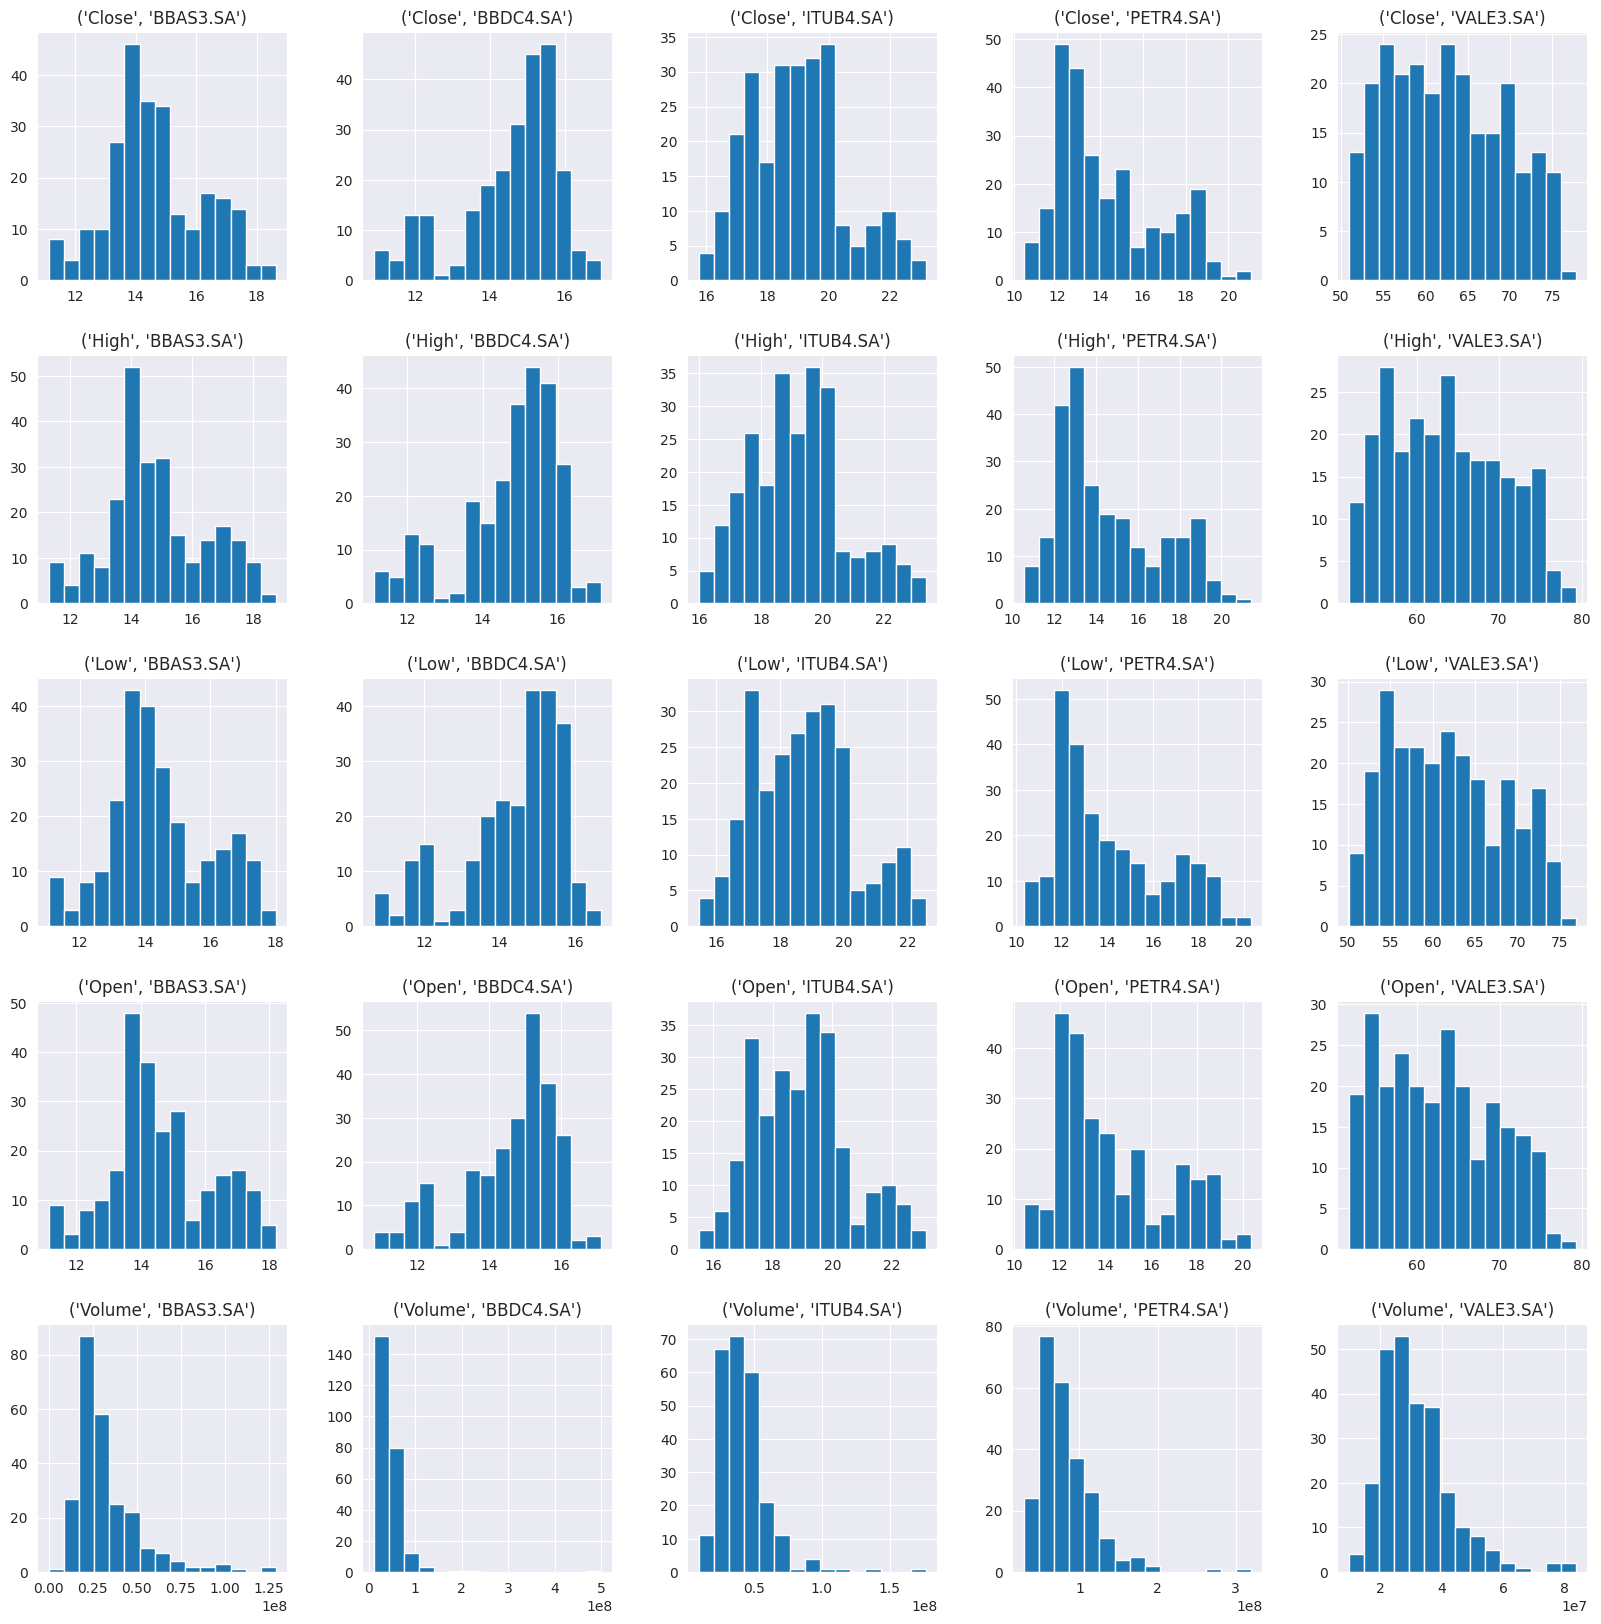

In [35]:

# plotar o histograma das variáveis numéricas
sns.set_style('darkgrid')
dados.hist(bins=15,figsize=(20,20));


# Análises

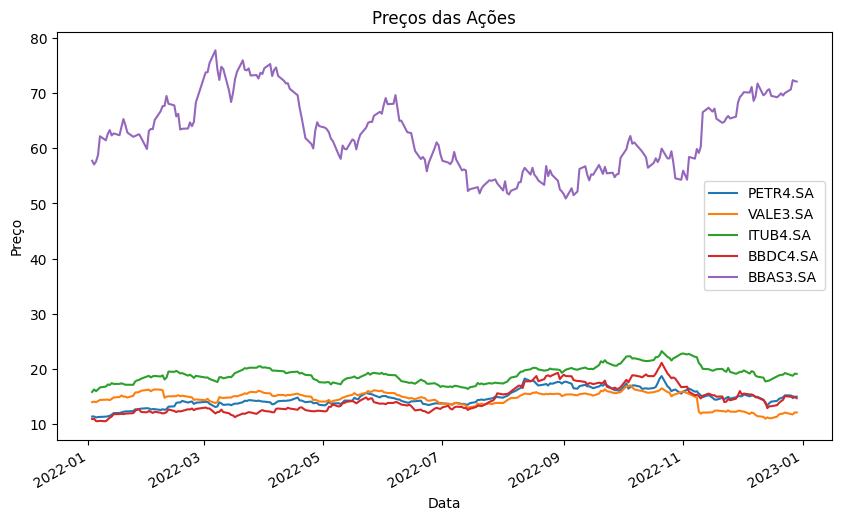

In [26]:
# Gráfico de preços das ações
dados['Close'].plot(title='Preços das Ações', figsize=(10, 6))
plt.ylabel('Preço')
plt.xlabel('Data')
plt.legend(acoes)
plt.show()

Em seguida, calcula-se a variação percentual diária do preço de cada ação, a qual é essencial para os cálculos das estatísticas descritivas

A variação percentual é dada por $ \frac{\text{Preço atual} - \text{Preço anterior}}{\text{Preço anterior}} $.


In [27]:

# Calcular os retornos percentuais diários
retornos = dados['Close'].pct_change()


Podendo ser calculadas a partir do desvio padrão, das variações percentuais diárias de cada ativo, indicando a magnitude da flotação do ativo em um determinado período de tempo, temos a volatilidade e seus respectivos resultados.

In [28]:

# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()


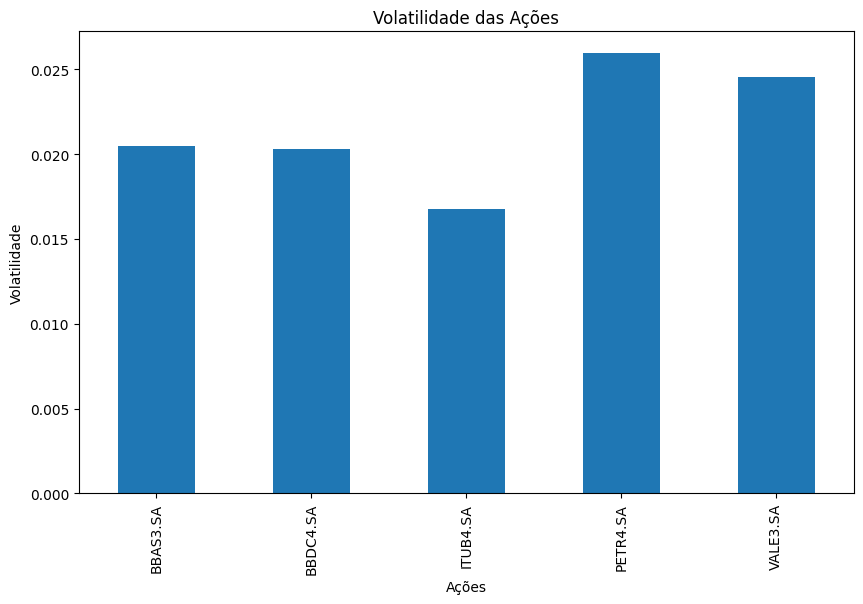

In [29]:
# Gráfico de volatilidade das ações
volatilidades.plot(kind='bar', title='Volatilidade das Ações', figsize=(10, 6))
plt.ylabel('Volatilidade')
plt.xlabel('Ações')
plt.show()



O grau de relacionamento entre duas variáveis, é determinado pelo coeficiente de Pearson, sendo o necessário para o cálculo, da matriz de correlação, a qual, permite uma boa visualização, da existência de uma correlação forte e positiva entre duas variáveis.    


In [30]:

# Calcular a matriz de correlação dos retornos
matriz_correlacao = retornos.corr()


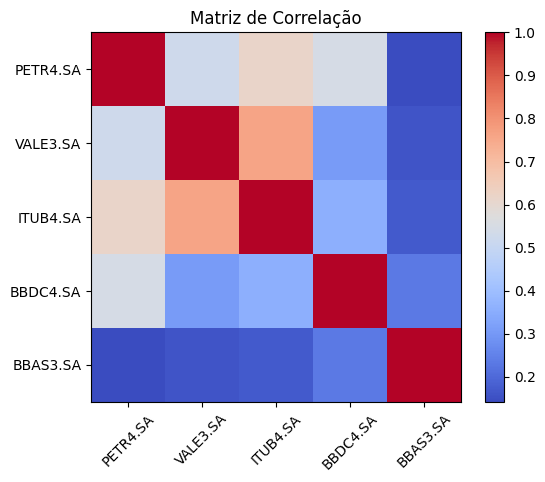

In [31]:
# Gráfico de matriz de correlação
plt.imshow(matriz_correlacao, cmap='coolwarm', interpolation='nearest')
plt.title('Matriz de Correlação')
plt.colorbar()
tick_marks = np.arange(len(acoes))
plt.xticks(tick_marks, acoes, rotation=45)
plt.yticks(tick_marks, acoes)
plt.show()

# Conclusões

Portanto, com essa análise, foi possível evidenciar dentro do portfólio e períodos escolhidos, quais seriam os ativos que teriam uma tendência de comportamento mais parecida e tomar as devidas precações para que o risco do portfólio seja minimizado a fim de obter o maior retorno possível com o menor risco evidente.